In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as random
from IPython.display import Image

### Lecture 17:

- Learn how to use the **seaborn** package to produce beautiful plots

- Learn about kernel density estimates

- Learn appropriate ways of representing different types of data

### seaborn

In this lecture, we will  learn about **seaborn**. **seaborn** is a package with many tools for data visualization. It allows you to make pretty plots. Almost anything in **seaborn** can be done using **matplotlib**, but with **seaborn**'s built-in functions you can reduce a lot of **matplotlib** code down to a single line.  **seaborn** isn't just a pretty face.  Its realy power is in statistical data analysis. It has a lot of functions built in for visualizing the distribution of your data, for example. Let's take a look at some of the plots we can make with this package. We can import it using:

In [3]:
import seaborn as sns

### Unusual distributions,  kernel density estimates and jointplots

In some cases, we have distributions of data that don't look like a simple (e.g., normal) distribution. In some cases the data are bimodal or have skewed shaped distributions.

Let's create some synthetic bimodal data by drawing from 2 separate normal/lognormal distributions and combining the two into a single bimodal data set.  We do this twice (once for $x$ and once for $y$).

In [4]:
xdata1=random.normal(20,25,5000)
xdata2=random.normal(100,25,5000) 
ydata1=random.lognormal(2,0.1,8000)
ydata2=random.lognormal(3,0.1,2000)
xdata=np.append(xdata1,xdata2)
ydata=np.append(ydata1,ydata2)

When we plot our xdata as a histogram, we can see that we have a broadly bimodal distribution. We can also plot the mean of the distribution as a red line.

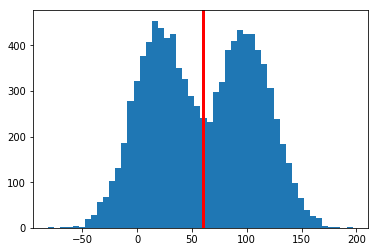

In [5]:
plt.hist(xdata,bins=50)
plt.axvline(np.mean(xdata),color='red',linewidth=3);

We can see that our mean lies right inbetween both of our peaks. Describing this distribution with  statistics like meant for normal distributions like mean or standard deviation is just plain wrong. 

One of the ways of representing the distribution of a set of datapoints is known as the 'kernel density estimate'. This is a useful way of showing the distribution of data. It places a 'kernel' (generally a normal distribution) at each data point and then sums them up.  This avoids the awkwardness of choice of bin size associated with histograms, for example. 

Here are some data represented ona bar plot on the left.  And on the right, we illustrate the idea behind kernal denisty estimates. The black lines are the location of each datapoint, the red dashed lines are the kernels and the thick blue line is the kernel density estimate. 

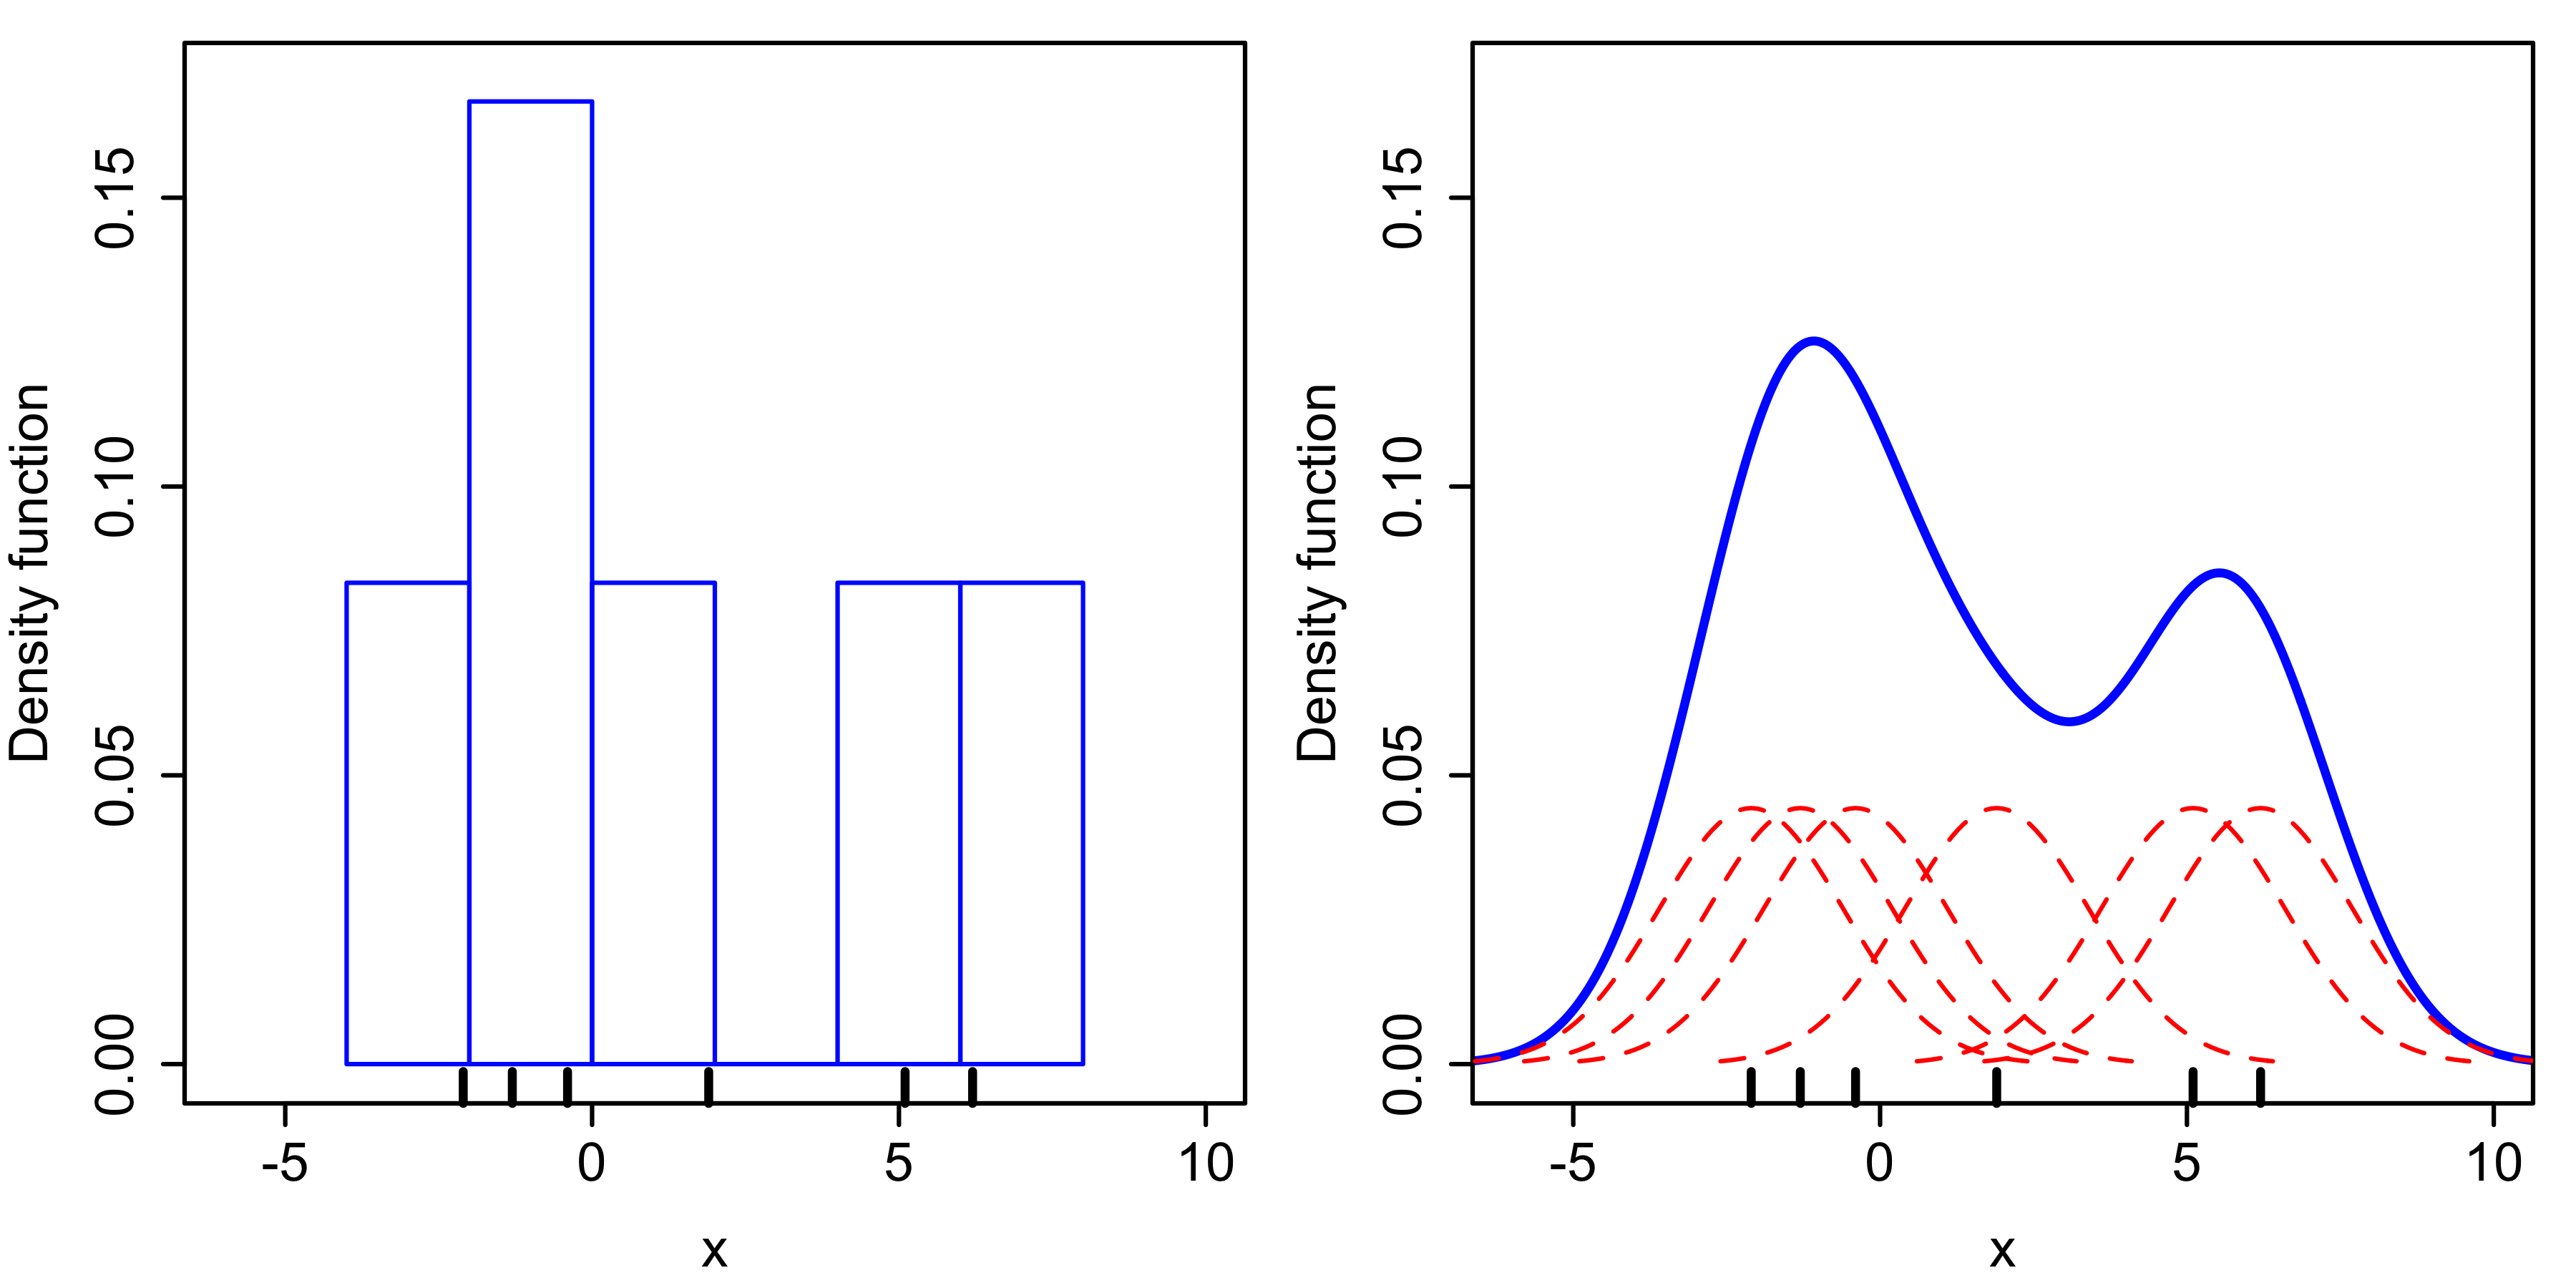

In [6]:
Image('Figures/KDE.png')

\[Source: https://commons.wikimedia.org/wiki/File:Comparison_of_1D_histogram_and_KDE.png Wikimedia Creative Commons\] 

Happily, we can plot kernel density estimates using the **sns.kdeplot( )** function. The **shade** argument allows us to shade the area underneath the curve. In matplotlib, the same thing can be achieved using the function **plt.fill_between**

/Users/brendan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


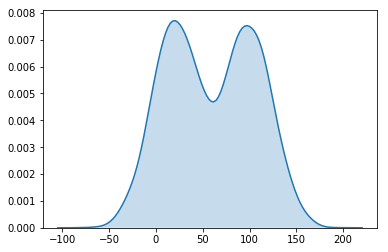

In [7]:
sns.kdeplot(xdata,shade=True);

We can also plot the density estimate and the histogram on top of one another using the **distplot** function.

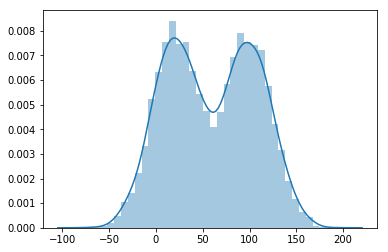

In [8]:
sns.distplot(xdata);

As you can see, this is a lot quicker than how we were plotting our distribution in the previous lecture!

With our $ydata$ we can see that we also have a bimodal distribution, but there are far fewer data points in the wider mode (we only used 2000 of our 10000 points for this mode).

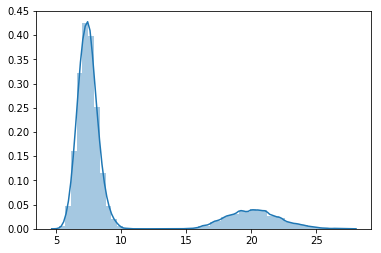

In [9]:
sns.distplot(ydata);

What if our data had both $x$ and $y$ components. For example, measurements of length and width from a set of shark teeth with two species in it.   How would we visualize it? Let's just try plotting the $x$ data on the x axis and $y$ data on the y axis as dots on a regular **matplotlib** plot.

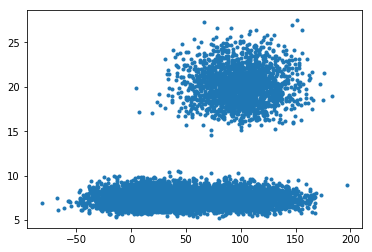

In [10]:
plt.plot(xdata,ydata,'.');

It's much harder to see the bimodal distribution in the $x$ data in this case, and we can't really see that there are so much fewer  data points in the $y$ data mode than the more tightly clustered one. Also, this is not a plot you would expect from length and width dimensions of teeth from a single species - wouldn't that be a linear plot?

When we have a lot of datapoints, this type of plot gives us  no easy way to estimate data density.
Fortunately, **seaborn** includes a cool plot called 'jointplot'. This combines the histograms and the scatter plot into a single graph.

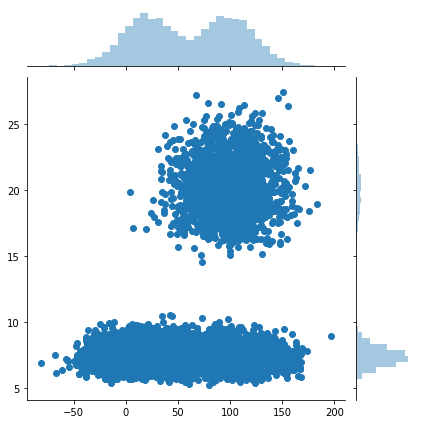

In [11]:
sns.jointplot(xdata,ydata);

Jointplot can also do kernel density estimates! The **kind** argument on this plot gives us many other options plotting data as well: 

In [12]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : strings or vectors
        Data or names of variables in ``data``.
    data : DataFrame, optional
        DataFrame when ``x`` and ``y`` are variable names.
    kind : { "scatter" | "reg" | "resid" | "kde" | "hex" }, optional
        Kind of plot to draw.
    stat_func : callable or None, optional
        *Deprecated*
    color : matplotlib color, optional
        Colo

Let's try the **kind=kde** option.  (Warning, doing a 2d kde plot like this is a lot of work so this cell might take a while to run).

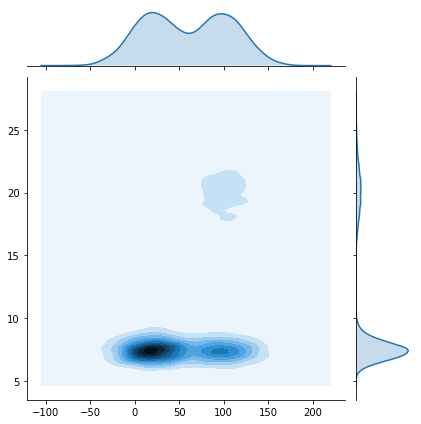

In [13]:
sns.jointplot(xdata,ydata,kind='kde');

Another type of plot that looks nice is the hexbin plot (kind of like a hexagonal 2d histogram)

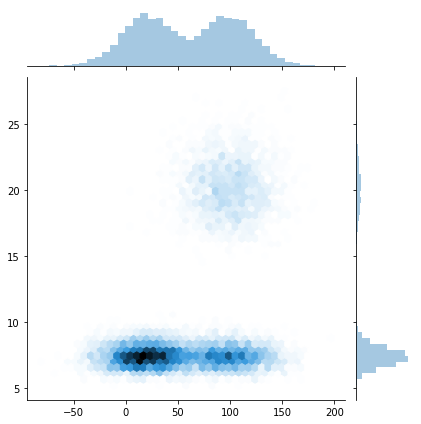

In [14]:
sns.jointplot(xdata,ydata,kind='hexbin');

### Multi dimensional data and pairplots

What if you have data with more dimensions? A good example of this is with isotopic data from Ocean Island Basalts.  Isotopic systems are used to "finger-print" different sources of melt and in the mantle, it is used to characterize what is deep in the Earth via what gets brought up to form the ocean islands.  By now there are data available for many different  isotopic systems.  Here we take a look at a small sample of what is in  the [GeoRoc database](http://georoc.mpch-mainz.gwdg.de/georoc/) for ocean island basalts.  

In [16]:
MantleArray=pd.read_csv('DataSets/GeoRoc/MantleArray_OIB.csv')
MantleArray.head()

,CITATION,EPSILON_HF,EPSILON_ND,HF176_HF177,LAND/SEA (SAMPLING),LATITUDE (MAX.),LATITUDE (MIN.),LOCATION,LOCATION COMMENT,LONGITUDE (MAX.),...,PB208_PB204,ROCK NAME,ROCK TYPE,SAMPLE NAME,SAMPLING TECHNIQUE,SR87_SR86,TECTONIC SETTING,TYPE OF MATERIAL,UNIQUE_ID,Year
0,[60] STILLE P. (1986),14.534010,7.607708,0.283196,SUBAERIAL,19.83,19.83,HAWAIIAN ISLANDS,NaN,-155.42,...,38.017,ANKARAMITE,VOLCANIC ROCK,samp. 79MK1,OUTCROP,0.70347,OCEAN ISLAND,WHOLE ROCK,107-79MK1,1986
1,[60] STILLE P. (1986),10.538041,6.378770,0.283083,SUBAERIAL,22.00,22.00,HAWAIIAN ISLANDS,NAPALI MEMBER,-159.50,...,37.803,THOLEIITE,VOLCANIC ROCK,samp. KAU-1,OUTCROP,0.70384,OCEAN ISLAND,WHOLE ROCK,5-KAU-1,1986
2,[60] STILLE P. (1986),11.033117,6.281235,0.283097,SUBAERIAL,22.00,22.00,HAWAIIAN ISLANDS,NAPALI MEMBER,-159.50,...,37.962,THOLEIITE,VOLCANIC ROCK,samp. 1D872-2,OUTCROP,0.70364,OCEAN ISLAND,WHOLE ROCK,NaN,1986
3,[60] STILLE P. (1986),12.164719,5.696027,0.283129,SUBAERIAL,21.15,21.15,HAWAIIAN ISLANDS,NaN,-156.97,...,37.751,THOLEIITE,VOLCANIC ROCK,samp. 71WMOL-1,OUTCROP,0.70378,OCEAN ISLAND,WHOLE ROCK,782-71WMOL-1,1986
4,[60] STILLE P. (1986),15.135173,5.891097,0.283213,SUBAERIAL,21.16,21.16,HAWAIIAN ISLANDS,NaN,-157.23,...,37.754,THOLEIITE,VOLCANIC ROCK,samp. 71WMOL-3,OUTCROP,0.70376,OCEAN ISLAND,WHOLE ROCK,783-71WMOL-3,1986


There are lots of different isotope ratios available. In this excersize, we focus on four different isotopic ratios:  $^{87}$Sr/$^{86}$Sr , $^{206}$Pb/$^{204}$Pb , $ \varepsilon$ Nd and $ \varepsilon$ Hf. (The ratios with an $ \varepsilon$ are the isotope ratios relative to a standard value in parts per 10000, this allows you to see the variation better as it is normally very small).  

So, how do you plot multi-dimensional data?  Fortunately, **seaborn** has a function for multi-dimensional data known as the **sns.pairplot( )**. This makes a plot that takes data with many  dimensions and plots each possible two dimensional combination against one another in a grid where each of the rows and columns represents a dimension. When a particular dimension is plotted against itself, however, it gives the kernal density estimates for the different data types (set by the keyward argument, **hue**). In this case we will be using $LOCATION$ to group the data).  

In our isotopic example, the top row plots $ \varepsilon$ Nd against all of the other isotope ratios in turn with the first plot on the left being the kernal density plot for each location with each in a different color. 

Let's see it in action (warning, cell may take a while to run due to large number of locations):

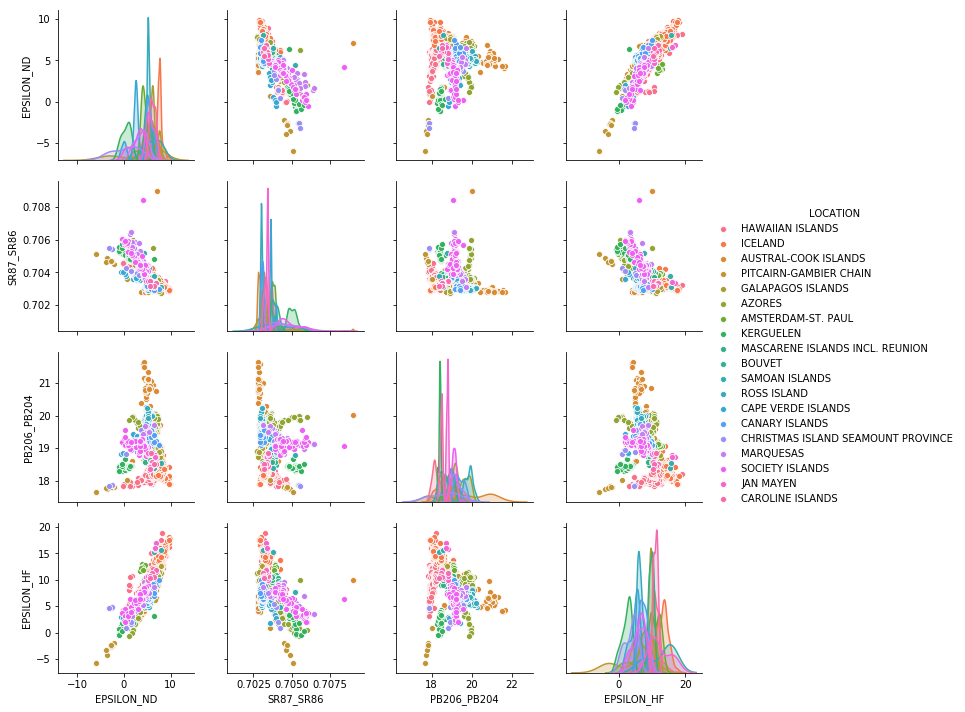

In [18]:
sns.pairplot(MantleArray,\
             vars=['EPSILON_ND','SR87_SR86','PB206_PB204','EPSILON_HF'],\
             hue='LOCATION');

**sns.pairplot( )** gives us an interesting way of seeing trends in multidimensional space. Some ocean islands have quite different isotopic compositions from others! It's important to note that some projections of these data (e.g.  $^{206}$Pb/$^{204}$Pb vs $ \varepsilon$ Nd) show this effect more prominently where as some like  $ \varepsilon$ Nd vs  $ \varepsilon$ Hf are more subtle. In this plot the Austral-Cook Islands are all the way on the top right, Iceland is at the top left and Pitcairn is way at the bottom. 

It might be surprising to some of you that know a little geophysics to see that there is this heterogeneity between different ocean islands, because you might think that the mantle is very well mixed by convection. Many geochemists believe that the source regions for the plumes that form these basalts have different compositions because subduction brings down crustal material with different compositions to the base of the mantle, and this material then upwells in plumes that form the ocean islands. The variation in isotopic ratios we see here comes from mixing between these recycled crustal end members and a mantle composition.

We will look further at this dataset when we learn how to plot things in three dimensions.  

### Box and whisker and violin plots

Now let's take a look at some data from Cromwell et al. (2015) (https://doi.org/10.1016/j.pepi.2014.12.007). These data are estimates of the Earth's magnetic field strength on Hawaii, estimated by comparing the original magnetization of these lava flows to a magnetization given to them in the lab. These lava flows are historical and so the actual strength of the magnetic field on Hawaii was known. Let's try and look at different ways we can represent Figure 4 of the paper.

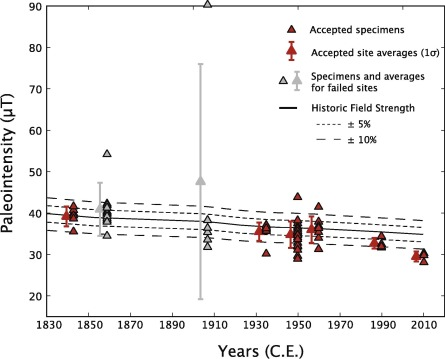

In [19]:
Image(filename='Figures/CromwellFig4.jpg')

In [20]:
CCRIT=pd.read_csv('CCRIT.csv')
CCRIT.head()

,Ages,B_est,B_exp
0,1843,39.90,39.9
1,1843,35.45,39.9
2,1843,41.53,39.9
3,1843,38.58,39.9
4,1843,39.32,39.9


We can pull out the ages and expected fields for these data to get the variation of the expected field through time.

In [21]:
Years=CCRIT.Ages.unique()
Indices=list(range(8))
B_exp=CCRIT.B_exp.unique()

One **seaborn** plot that is commonly used for this kind of data is the Box and Whisker plot (**sns.boxplot( )**). This plot can be advantageous in that it doesn't assume a normal distribution for the data and just takes the percentiles. Let's plot our data as blue box and whisker plots. Note that these plots don't space linearly with age, just sequentially  along the x axis as they're often used to compare different categories of data.

In [22]:
Years=CCRIT.Ages.unique()
Indices=list(range(8))
B_exp=CCRIT.B_exp.unique()

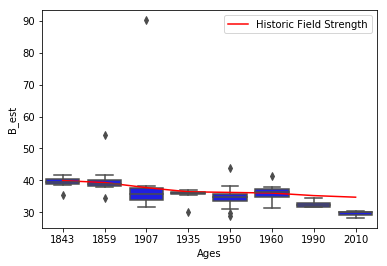

In [23]:
sns.boxplot(x='Ages',y='B_est',data=CCRIT,color='blue')

plt.plot(Indices,B_exp,'r',label='Historic Field Strength')
plt.legend();

This doesn't look great. The black diamonds are known as 'fliers' and represent outliers. As we have some pretty large outliers in this dataset, we need to either limit the range on the y axis or by making the plot larger. These fliers are annoying  I'm going to replace them with a small circle and exclude them from the box and whisker plot,  using the argument **fliersize=0**. In order to see the data points that overlap one another, **seaborn** also has an option to plot the data points in a cloud using the function **sns.swarmplot( )**.  Here we do both of these (and also make the points white with a black edge).

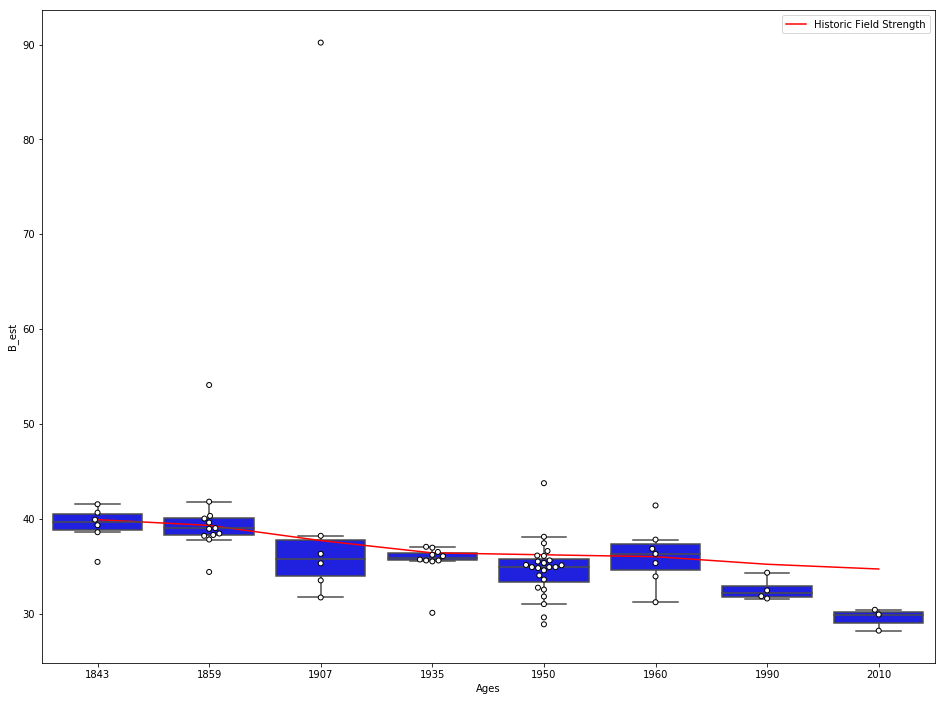

In [24]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Ages',y='B_est',data=CCRIT,color='blue',fliersize=0)
sns.swarmplot(x='Ages',y='B_est',data=CCRIT,color='white',edgecolor='black',linewidth=1)

plt.plot(Indices,B_exp,'r',label='Historic Field Strength')
plt.legend();

Now we can see all the data. Less commonly used than the boxplot is the violin plot. This is similar to a box and whisker plot except the kernel density estimate of the data is plotted on the x axis on either side of the x value.

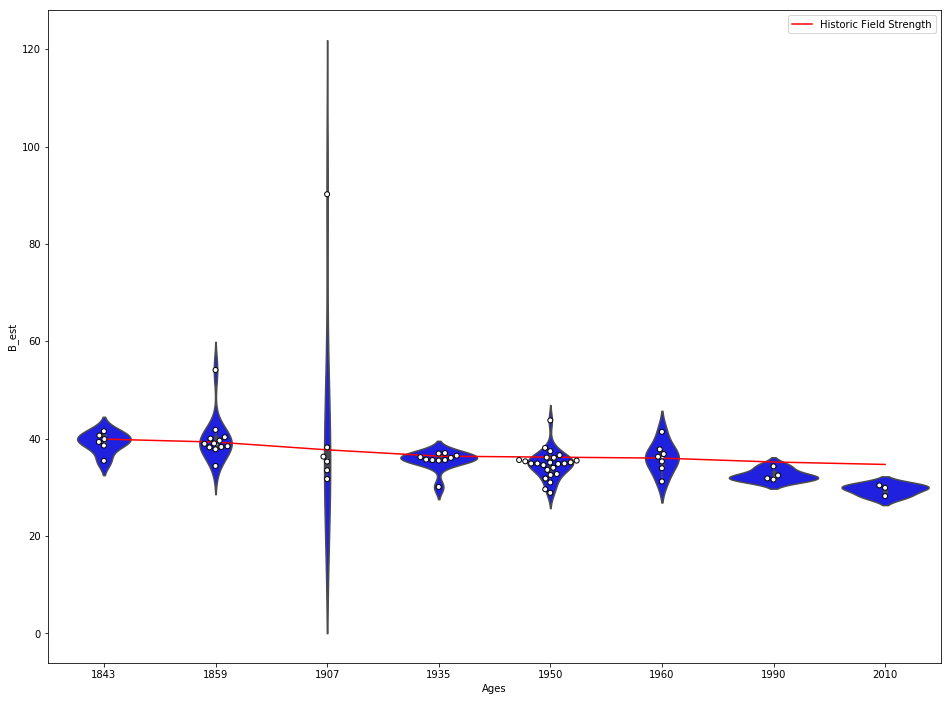

In [25]:
plt.figure(figsize=(16,12))
sns.violinplot(x="Ages", y="B_est", data=CCRIT,color='blue')
sns.swarmplot(x='Ages',y='B_est',data=CCRIT,color='white',edgecolor='black',linewidth=1)
plt.plot(Indices,CCRIT.B_exp.unique(),'r',label='Historic Field Strength')

plt.legend();

Often, the violin plot gives a more accurate representation of the distribution of a dataset.

# Assignment #6
- Rename the notebook with the format LastnameFirstInitial_HomeworkNumber.  For example, **CychB_6**

### 1.  

- Simulate a dataset with a log normal distribution, a mean of 1, a standard deviation of .1 and a size (N) of 100 

    - Plot the data using a linear X-scale
    - Calculate the mean, median, mode, skewness, and kurtosis for the distribution 
    - Plot the mean, median, and mode as vertical lines
    - Plot the skewness and kurtosis as notes on the plot
    - Include a legend


### 2.  
- Plot your simulated distribution using a log X-scale (apply **np.log()** to your dataset)  
- Calculate the mean, median, mode, skewness, and kurtosis
- Plot the mean, median, and mode as vertical lines
- Plot the skewness and kurtosis as notes on the plot
- Include a legend 

### 3. 
- Make a heat map of volcano locations in the Seattle region
    - We  searched for data between 32-49N and 124-110W on the NAVDAT database:  http://www.navdat.org/NavdatSearch/Search.cfm as excel spreadsheet.  We  translated it to WUS_navdat.txt in the Datasets folder.  
    - Read in this datafile as a Pandas DataFrame. 
    - Filter the data for ages within the last 10,000
    - Filter the data to be between 40 and 50 degrees latitude and -124 and -110 longitude
    - make **NumPy** arrays for the latitude and longitude values
    - make a matplotlib figure (plt.figure()) with height and width both 10
    - a heat map is really a 2d histogram in color and there is a handy function in **matplotlib** that makes a  plot called plt.hist2d().  Look at the help message for that function.
    - call **plt.hist2d()** with  your longitude, latitude arrays as x and y and 25 bins.
    - label your x and y axes Longitude and Latitude respectively. 
    - make a big red star (markersize=25) at the location of Seattle (47.61N,122.33W).  
    - give your plot the title "Volcano density near Seattle" 
    
    - Make the same figure, but this time use the seaborn function **sns.kdeplot()**. Use the argument **shade=True** to fill in your contours.
    